## Finding an estimate for stratification on the downstream side of the canyon

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import scipy.stats 
import seaborn as sns
import xarray as xr

In [2]:
# Set appearance options seaborn

sns.set_style('white')
sns.set_context('notebook')

# Set necessary grid variables and grid file
grid = xr.open_dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc')
rc = grid.RC


In [3]:
# Create an empty class to save information of every run

class run:
    pass

In [8]:
def linear_regression(x, y, prob):
    """
    Return the linear regression parameters and their <prob> confidence intervals.
    ex:
    >>> linear_regression([.1,.2,.3],[10,11,11.5],0.95)
    """
    x = np.array(x)
    y = np.array(y)
    n = len(x)
    xy = x * y
    xx = x * x

    # estimates

    b1 = (xy.mean() - x.mean() * y.mean()) / (xx.mean() - x.mean()**2)
    b0 = y.mean() - b1 * x.mean()
    s2 = 1./n * sum([(y[i] - b0 - b1 * x[i])**2 for i in range(n)])
    print ('b0 = ',b0)
    print ('b1 = ',b1)
    print ('s2 = ',s2)
    
    #confidence intervals
    
    alpha = 1 - prob
    c1 = scipy.stats.chi2.ppf(alpha/2.,n-2)
    c2 = scipy.stats.chi2.ppf(1-alpha/2.,n-2)
    print ('the confidence interval of s2 is: ',[n*s2/c2,n*s2/c1])
    
    c = -1 * scipy.stats.t.ppf(alpha/2.,n-2)
    bb1 = c * (s2 / ((n-2) * (xx.mean() - (x.mean())**2)))**.5
    print ('the confidence interval of b1 is: ',[b1-bb1,b1+bb1])
    
    bb0 = c * ((s2 / (n-2)) * (1 + (x.mean())**2 / (xx.mean() - (x.mean())**2)))**.5
    print ('the confidence interval of b0 is: ',[b0-bb0,b0+bb0])
    return ([n*s2/c2,n*s2/c1],[b1-bb1,b1+bb1],[b0-bb0,b0+bb0])

In [9]:
expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           'CNTDIFF_run45',
           'CNTDIFF_run44',
           'CNTDIFF_run46',
           'CNTDIFF_run73',
           'CNTDIFF_run75',
           'CNTDIFF_run67',
           'CNTDIFF_run51',
           'CNTDIFF_run52',
           'CNTDIFF_run69',
           'CNTDIFF_run71',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07',
           'LESS_BF_run01',
           'LESS_BF_run03']

markersizes = [15,13,11,9,13,13,11,11,9,13,13,11,11,9,11,11,11,11,13,11]
markerstyles = ['o','o','o','o','d',"d","d",'d','d','p','p','p','p','p','^','^','^','^','*','*']

exp_labels = ['$\kappa$=10$^{-7}$',
              '$N_0$=5.5x10$^{-3}$,$\kappa$=10$^{-5}$,f=9.66x10$^{-5}$,U=0.34 m/s',
              '$\kappa$=10$^{-4}$',
              '$\kappa$=10$^{-3}$',
              '$N_0$=6.3x10$^{-3}$',
              '$N_0$=3.9x10$^{-3}$',
              '$N_0$=3.0x10$^{-3}$',
              '$N_0$=7.4x10$^{-3}$',
              '$N_0$=4.5x10$^{-3}$',
              'f=1.0x$10^{-4}$',
              'f=7.68x10$^{-5}$',
              'f=4.84x10$^{-5}$',
              'f=8.6x10$^{-5}$',
              'f=6.4x10$^{-5}$',
              '$\kappa$=10$^{-3}$,$\kappa_o$=10$^{-7}$',
              '$\kappa$=10$^{-4}$,$\kappa_o$=10$^{-7}$',
              '$\kappa$=10$^{-3}$,$\kappa_o$=10$^{-5}$',
              '$\kappa$=10$^{-4}$,$\kappa_o$=10$^{-5}$',
              'U=0.31 m/s',
              'U=0.20 m/s',
             ]

colours = ["pine",
           "emerald",#
          "tealish",
          "teal blue",# 
           "slate grey",
           "black",
           "grey",
           'light grey',
           'steel',
           "navy blue",
           "blue",
           "cerulean",
           "light blue",
           'sky blue',
          "deep rose",
          "cherry red",
          "brown",
          "gold",
           "red",
          "dark red"]# 


Nos = np.array([5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                6.3E-3,3.9E-3,3.0E-3,7.4E-3,4.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                5.5E-3,5.5E-3])

fs = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               1.0E-4,7.68E-5,4.84E-5,8.6E-5,6.4E-5,
               9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               9.66E-5,9.66E-5])

Us = np.array([0.34,0.34,0.34,0.34,
               0.34,0.34,0.34,0.34,0.34,
               0.34,0.34,0.34,0.34,0.34,
               0.34,0.34,0.34,0.34,
               0.31,0.20])

Kvs = np.array([1E-7,1E-5,1E-4,1E-3,
                1E-5,1E-5,1E-5,1E-5,1E-5,
                1E-5,1E-5,1E-5,1E-5,1E-5,
                1E-3,1E-4,1E-3,1E-4,
                1E-5,1E-5])


#Define all runs, create empty run records
CNTDIFF_kv7 = run()  
CNTDIFF_base = run()
CNTDIFF_kv4 = run()
CNTDIFF_kv3= run()
CNTDIFF_N63 = run()
CNTDIFF_N39 = run()
CNTDIFF_N30 = run()
CNTDIFF_N74 = run()
CNTDIFF_N45 = run()
CNTDIFF_f100 = run()
CNTDIFF_f76 = run()
CNTDIFF_f48 = run()
CNTDIFF_f86 = run()
CNTDIFF_f64 = run()
DIFF3D_run04 = run()
DIFF3D_run05 = run()
DIFF3D_run06 = run()
DIFF3D_run07 = run()
LESS_BF_u31 = run()
LESS_BF_u20 = run()

records = [CNTDIFF_kv7,
           CNTDIFF_base, 
           CNTDIFF_kv4, 
           CNTDIFF_kv3,
           CNTDIFF_N63, 
           CNTDIFF_N39,
           CNTDIFF_N30,
           CNTDIFF_N74,
           CNTDIFF_N45,
           CNTDIFF_f100,
           CNTDIFF_f76,
           CNTDIFF_f48,
           CNTDIFF_f86,
           CNTDIFF_f64,
           DIFF3D_run04,
           DIFF3D_run05,
           DIFF3D_run06,
           DIFF3D_run07,
           LESS_BF_u31,
           LESS_BF_u20]

# Fill the fields of the records
for record,expName,No,fo,uo,kvo,col,explabel,marksize,markstyle in zip(records,expNames,
                                                                   Nos,fs,Us,Kvs,
                                                                   colours,exp_labels,
                                                                   markersizes,markerstyles):
    record.name = expName
    record.label = explabel
    record.color = col
    record.msize = marksize
    record.mstyle = markstyle
    record.N = No
    record.f = fo
    record.u = uo
    record.kv = kvo


In [10]:
# Constants and scales

L = 6400.0 # canyon length
R = 5000.0 # Upstream radius of curvature
g = 9.81 # accel. gravity
Wsb = 13000 # Width at shelf break
Hs = 150.0 # Shelf break depth

# NOTE: The default values of all functions correspond to the base case

def Dh(f=9.66E-4,L=6400.0,N=5.5E-3):
    '''Vertical scale Dh'''
    retun(f*L/(N))
    
def Z(U=0.36,L=6400.0,N=5.5E-3,R=5000.0):
    '''Depth of upwelling as scaled in Allen and Hickey 2010'''
    return((1.4*U*(L**(1/2)))/(Nos*(R**(1/2))))

def Ro(U=0.36,f=9.66E-4,R=5000.0):
    '''Rossby number using radius of curvature as length scale'''
    return(U/(f*R))

def F(Ro):
    '''Function that estimates the hability of the flow to follow isobaths'''
    return(Ro/(0.9+Ro))

def Rw(U=0.36,f=9.66E-5,Wsb=13000.0): 
    '''Rossby number using width at shelf break as length scale'''
    return(U/(f*Wsb))

def Bu(N=5.5E-3,f=9.66E-5,L=6400.0,Hs=150.0):
    '''Burger number'''
    return(N*Hs/(f*L))

def RossbyRad(N=5.5E-3,Hs=150.0,f=9.66E-4):
    '''1st Rossby radius of deformation'''
    return(N*Hs/f)


In [35]:
# Save mean maximum N of days 3-6 and std for each run.

keys = ['Tr_tt06','Tr_tt08','Tr_tt10','Tr_tt12']
key0 = 'Tr_tt02'
stname = 'DnC' # Station at downstream side of canyon

for record in records:
    
    filename1 = ('../results/metricsDataFrames/Tr1_%s_%s.csv' % (record.name,stname))
    df = pd.read_csv(filename1)
    
    #df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df[keys[0]][26:])   
    maxd4 = max(df[keys[1]][26:])   
    maxd5 = max(df[keys[2]][26:])   
    maxd6 = max(df[keys[3]][26:])   
    
    
    record.maxTr = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    record.stdTr = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    record.TrSh = df[keys[2]][30]
    

### Tr vertical gradient proportional to isopycnal tilting

Similarly to what we did for N, 
N/No represents the relative increase of stratification from the initial value after the upwelling adjustment has occured. It makes sense to think that this relation is proportional to the tilting of isopycnals within the canyon, given by $Z$, where $Z$ is the depth of upwelling, non-dimentionalized by Hs, the depth of the shelf break. This ight not be the right scale for this but for now and since I am not changing the canyon, I will keep this.

$$\frac{\nabla_zC}{\nabla_zCo}=\beta \frac{Z}{H_s}$$

where $Z = \frac{{fu\mathcal{F}L}^{1/2}}{N_0}$, $\mathcal{F}$ is $Ro/(1+Ro/0.9)$, $Ro$ is a Rossy number with $\mathcal{R}$ as a length scale (Howatt and Allen (2013) say it should be $Wsb$). This leaves



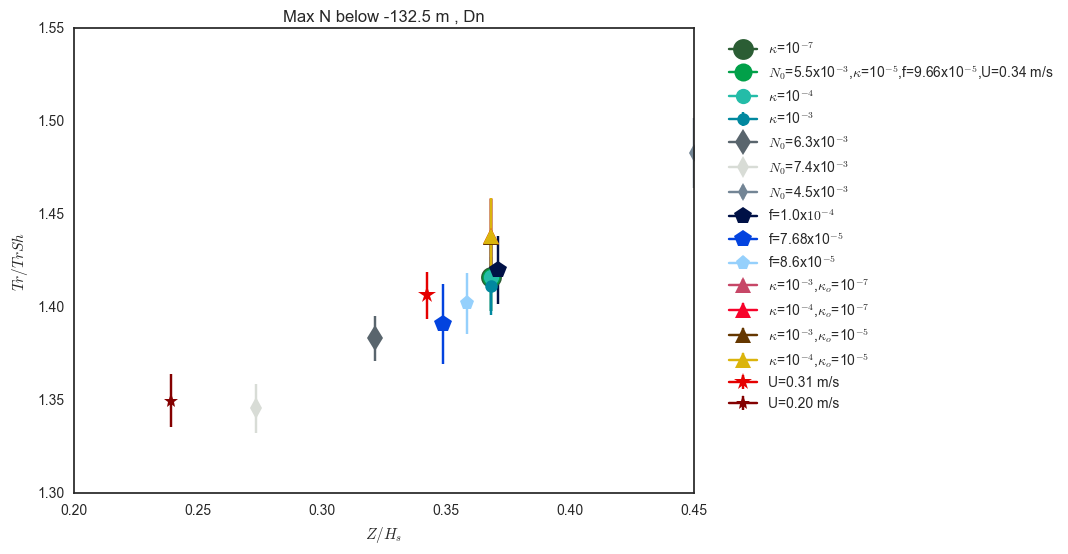

In [37]:
# Let's see it if works

# Choose only the runs that satisfy all restrictions in Allen and Hickey (2010)
records_AH2010 = [CNTDIFF_kv7,
                  CNTDIFF_base, 
                  CNTDIFF_kv4, 
                  CNTDIFF_kv3,
                  CNTDIFF_N63, 
                  CNTDIFF_N74,
                  CNTDIFF_N45,
                  CNTDIFF_f100,
                  CNTDIFF_f76,
                  CNTDIFF_f86,
                  DIFF3D_run04,
                  DIFF3D_run05,
                  DIFF3D_run06,
                  DIFF3D_run07,
                  LESS_BF_u31,
                  LESS_BF_u20]

stname = 'DnC' # Station at downstream side of canyon

fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]

for rec in records_AH2010:
    
    plt1 = ax.errorbar(((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/(Hs*rec.N),rec.maxTr/9.0,
                       yerr = rec.stdTr/9.0, # since rec.N is a constant
                       marker = rec.mstyle,
                       markersize = rec.msize,
                       color = sns.xkcd_rgb[rec.color],
                       label=rec.label)
   
    ax.set_title('Max N below %1.1f m , Dn' %rc[26])
    ax.set_ylabel('$Tr/TrSh$')
    ax.set_xlabel('$Z/H_s$')

    ax.legend(bbox_to_anchor=(1.6,1))
#ax.set_xscale('log')    

plt.show()
